<h3>Dataset</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<h3>Data preparation</h3>

In [4]:
required_features = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'  
]
df = df[required_features]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
for col in categorical_features:
    print(f'{col}:')
    print(df[col].unique())

job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:
['married' 'single' 'divorced']
education:
['tertiary' 'secondary' 'unknown' 'primary']
housing:
['yes' 'no']
contact:
['unknown' 'cellular' 'telephone']
month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome:
['unknown' 'failure' 'other' 'success']
y:
['no' 'yes']


In [7]:
numerical_features = list(df.dtypes[df.dtypes != 'object'].index)
for col in numerical_features:
    print(f'{col}:')
    print(df[col].nunique())

age:
77
balance:
7168
day:
31
duration:
1573
campaign:
48
pdays:
559
previous:
41


In [8]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<h4>Question 1</h4>

In [9]:
df.education.mode()

0    secondary
Name: education, dtype: object

<h4>Question 2</h4>

In [10]:
df[numerical_features].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


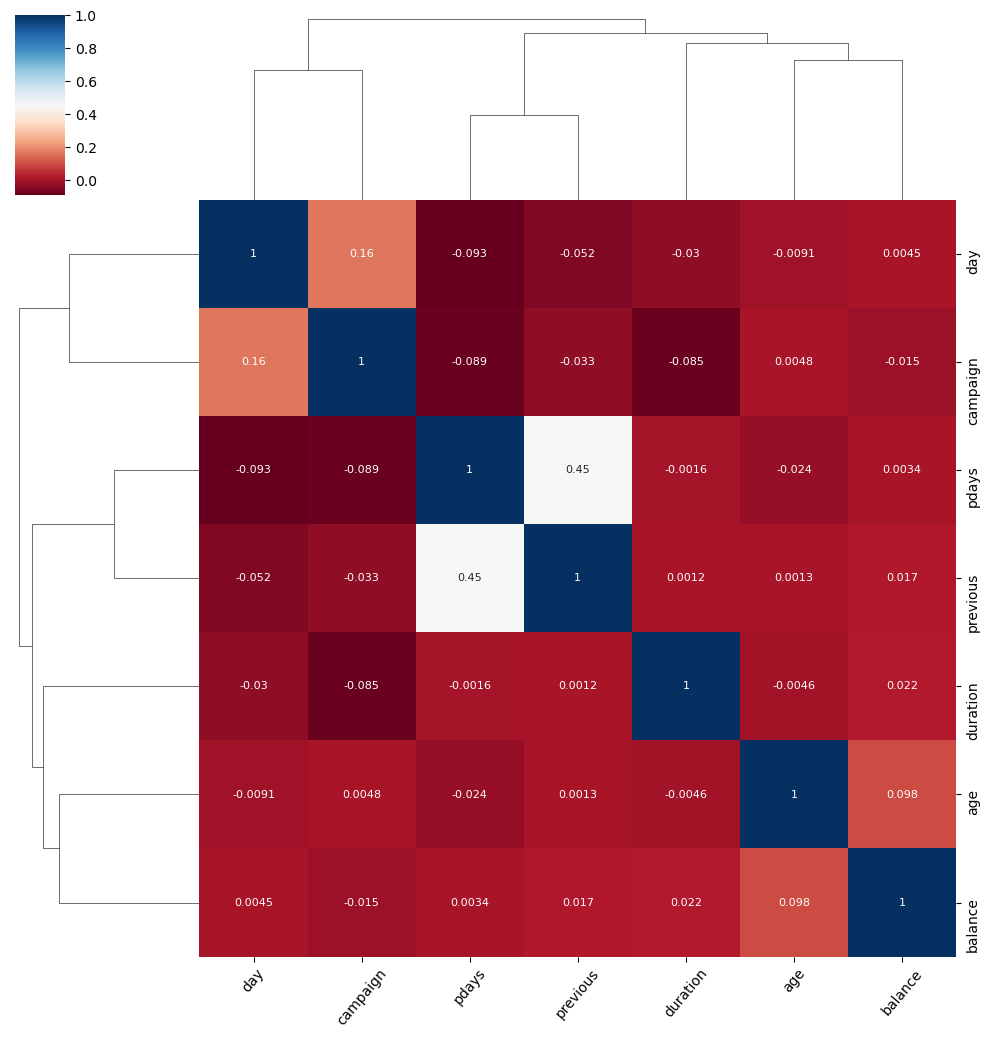

In [11]:
corr_heatmap = sns.clustermap(df[numerical_features].corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(corr_heatmap.ax_heatmap.get_xticklabels(), rotation=50);
plt.show()

<h3>Target encoding</h3>

In [12]:
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

<h3>Split the data</h3>

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print("df_train: ", len(df_train))
print("df_val: ", len(df_val))
print("df_test: ", len(df_test))

df_train:  27126
df_val:  9042
df_test:  9043


In [14]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_full_train['y']
del df_train['y']
del df_val['y']
del df_test['y']

<h4>Question 3</h4>

In [16]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

categorical_features = list(df_train.dtypes[df_train.dtypes == 'object'].index) 
mi = df_train[categorical_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

<h4>Question 4</h4>

In [17]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(27126, 47)
(9042, 47)
(9043, 47)


In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
round((churn_decision == y_val).mean(), 2)

0.9

<h4>Question 5</h4>

In [28]:
def get_logistic_regression_score(df_train, df_val, y_train, y_val, features):
    df_train = df_train[features]
    df_val = df_val[features]    
    
    dv = DictVectorizer(sparse=False)

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    
    dv.fit(train_dicts)
    X_train = dv.transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    churn_decision = (y_pred >= 0.5)
    return (churn_decision == y_val).mean()

In [34]:
score_history = {}

In [35]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

score = get_logistic_regression_score(df_train, df_val, y_train, y_val, features)
print('Score ALL features:', score)
score_history['all'] = score

for i in range(len(features)):
    modified_list = features[:i] + features[i+1:]
    score = get_logistic_regression_score(df_train, df_val, y_train, y_val, modified_list)
    print(f"Score without feature '{features[i]}': {score}")
    score_history[features[i]] = score

Score ALL features: 0.9007962840079629
Score without feature 'age': 0.9012386640123866
Score without feature 'job': 0.9011280690112807
Score without feature 'marital': 0.9001327140013271
Score without feature 'education': 0.9010174740101747
Score without feature 'balance': 0.9014598540145985
Score without feature 'housing': 0.9007962840079629
Score without feature 'contact': 0.900464499004645
Score without feature 'day': 0.9012386640123866
Score without feature 'month': 0.8996903339969033
Score without feature 'duration': 0.8890732138907321
Score without feature 'campaign': 0.9006856890068569
Score without feature 'pdays': 0.9010174740101747
Score without feature 'previous': 0.9011280690112807
Score without feature 'poutcome': 0.893828798938288


In [36]:
score_history

{'all': 0.9007962840079629,
 'age': 0.9012386640123866,
 'job': 0.9011280690112807,
 'marital': 0.9001327140013271,
 'education': 0.9010174740101747,
 'balance': 0.9014598540145985,
 'housing': 0.9007962840079629,
 'contact': 0.900464499004645,
 'day': 0.9012386640123866,
 'month': 0.8996903339969033,
 'duration': 0.8890732138907321,
 'campaign': 0.9006856890068569,
 'pdays': 0.9010174740101747,
 'previous': 0.9011280690112807,
 'poutcome': 0.893828798938288}

In [37]:
for key, value in score_history.items():
    print(key, abs(score_history['all'] - value))

all 0.0
age 0.00044238000442375913
job 0.00033178500331787486
marital 0.0006635700066357497
education 0.00022119000221187957
balance 0.0006635700066356387
housing 0.0
contact 0.00033178500331787486
day 0.00044238000442375913
month 0.0011059500110595089
duration 0.011723070117230727
campaign 0.0001105950011059953
pdays 0.00022119000221187957
previous 0.00033178500331787486
poutcome 0.006967485069674817


<h4>Question 6</h4>

In [50]:
def train_regularized_logistic_regression(X_train, X_val, y_train, y_val, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    churn_decision = (y_pred >= 0.5)
    return round((churn_decision == y_val).mean(), 3)

In [53]:
C_values = [0.01, 0.1, 1, 10, 100]

dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
dv.fit(train_dicts)

X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)

for c_value in C_values:
    print(c_value, ':', end='')
    score = train_regularized_logistic_regression(X_train, X_val, y_train, y_val, c_value)
    print(score)

0.01 :0.898
0.1 :0.901
1 :0.901
10 :0.901
100 :0.902
